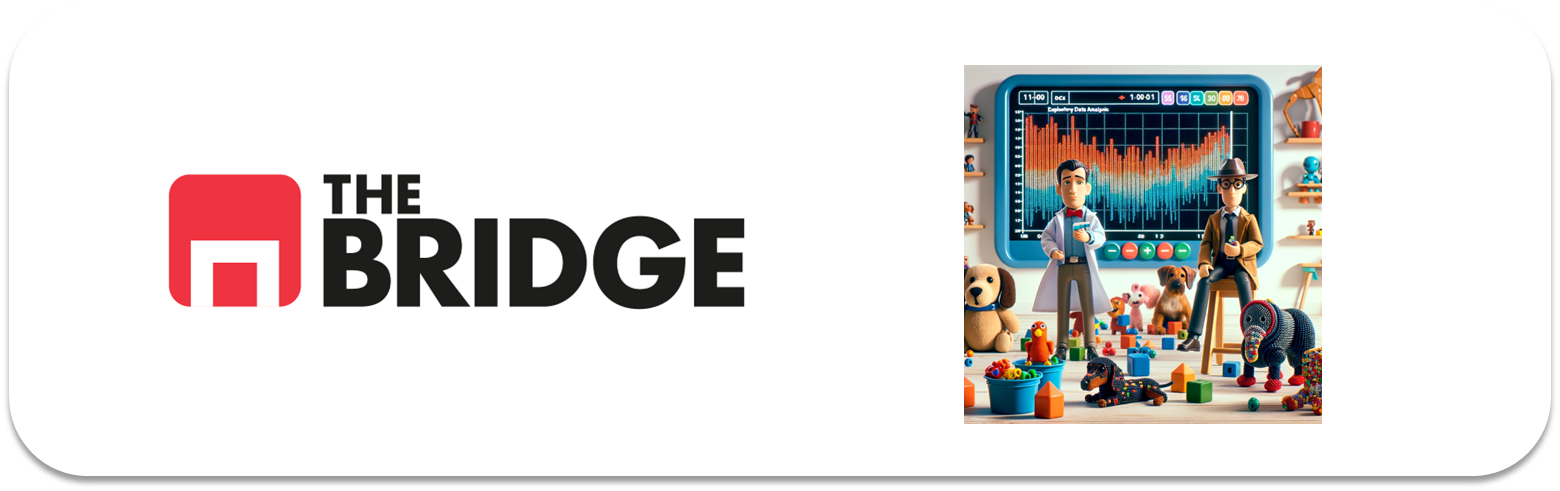

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu, chi2_contingency
import squarify

import bootcampviztools as bct

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df = pd.read_csv('./data/titanic.csv')

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
bct.drop_selcol_corr(df)

Parejas de columnas con correspondencia:
1: survived - alive
2: pclass - class
3: embarked - embark_town
Se eliminó la columna 'survived' de la pareja 'alive - survived'
Se eliminó la columna 'pclass' de la pareja 'class - pclass'
Se eliminó la columna 'embarked' de la pareja 'embark_town - embarked'


{'alive': 'survived', 'class': 'pclass', 'embark_town': 'embarked'}

In [4]:
df.drop(columns='deck', inplace= True)
df.dropna(thresh = len(df.columns)-1, inplace = True)
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df['family_menbers'] = df['parch'] + df['sibsp']
df.drop(columns=['parch', 'sibsp'], inplace= True)
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_menbers
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [8]:
moda = df['embark_town'].mode()[0]  # Calcula la moda de la columna

df['embark_town'].fillna(moda, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_menbers  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [10]:
bct.fillna_media_referida('age', 'who', df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_menbers  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [29]:
# Vamos a crear una nueva columna adult_child para poder tener el dato por separado. 
def determinar_tipo(valor):
    if valor in ['man', 'woman']:
        return 'adult'
    else:
        return valor
df['adult_child'] = df['who'].apply(determinar_tipo)
df.head(10)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_menbers,adult_child
0,male,22.00,7.2500,Third,man,True,Southampton,no,False,1,adult
1,female,38.00,71.2833,First,woman,False,Cherbourg,yes,False,1,adult
2,female,26.00,7.9250,Third,woman,False,Southampton,yes,True,0,adult
3,female,35.00,53.1000,First,woman,False,Southampton,yes,False,1,adult
4,male,35.00,8.0500,Third,man,True,Southampton,no,True,0,adult
5,male,33.17,8.4583,Third,man,True,Queenstown,no,True,0,adult
6,male,54.00,51.8625,First,man,True,Southampton,no,True,0,adult
7,male,2.00,21.0750,Third,child,False,Southampton,no,False,4,child
8,female,27.00,11.1333,Third,woman,False,Southampton,yes,False,2,adult
9,female,14.00,30.0708,Second,child,False,Cherbourg,yes,False,1,child


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

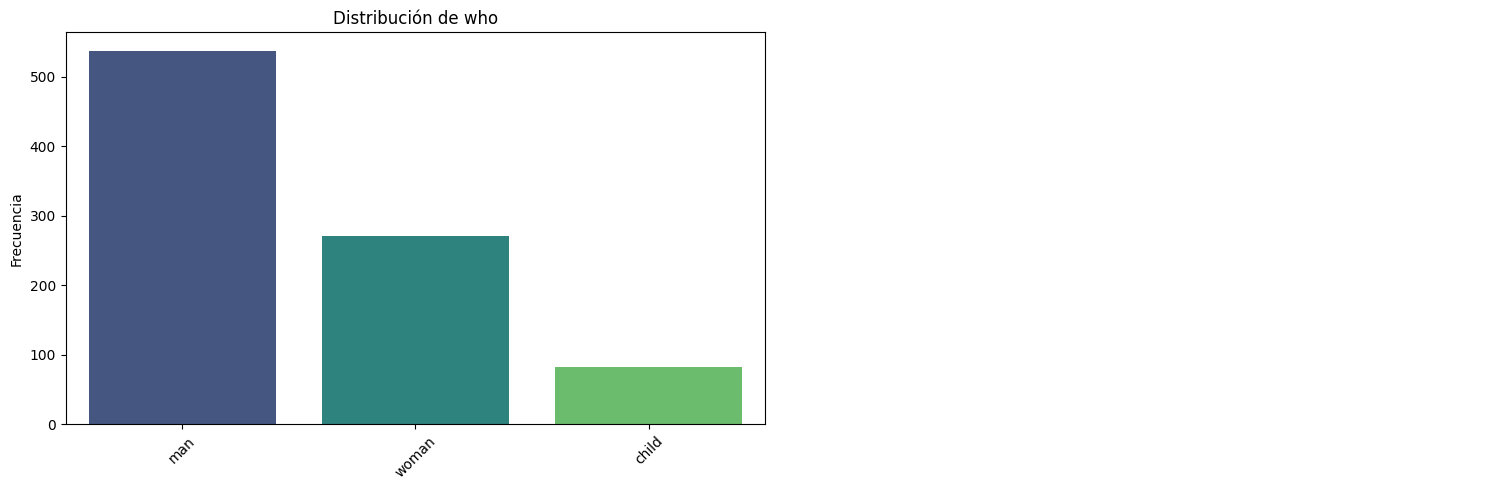

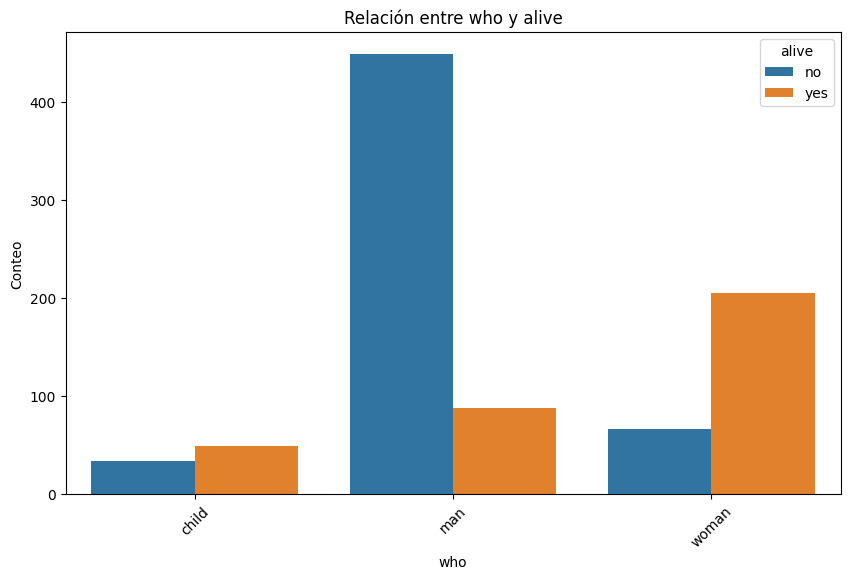

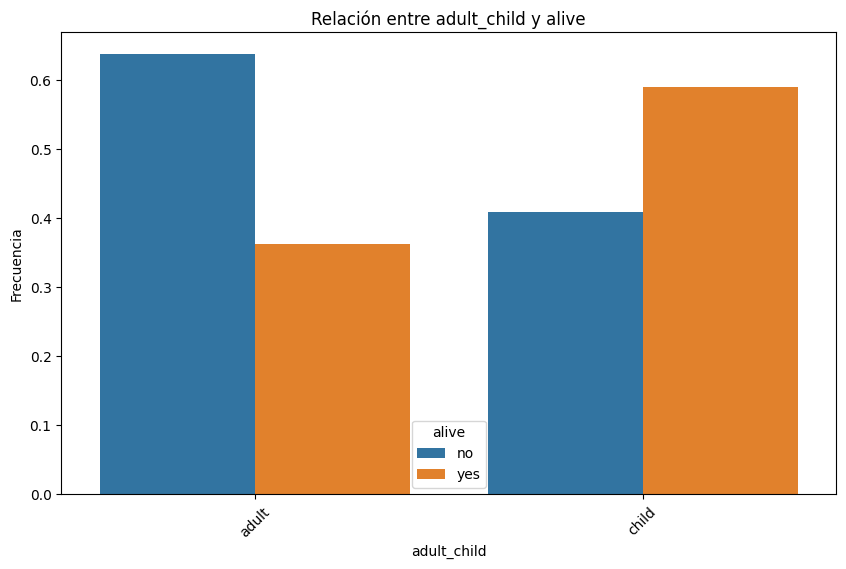

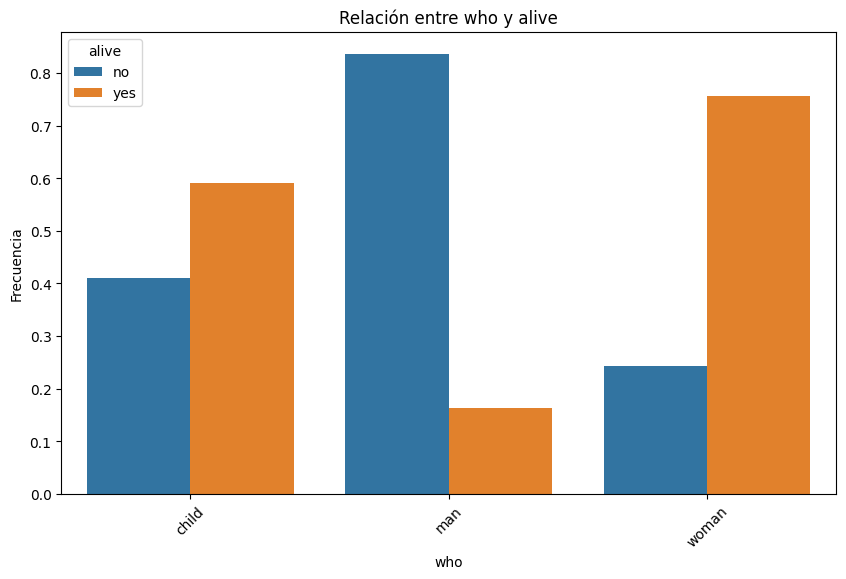

In [35]:
bct.pinta_distribucion_categoricas(df, ['who'])
bct.plot_categorical_relationship_fin(df, 'who', 'alive')
bct.plot_categorical_relationship_fin(df, 'adult_child', 'alive', relative_freq=True)
bct.plot_categorical_relationship_fin(df, 'who', 'alive', relative_freq=True)

In [24]:
tabla_contingencia = pd.crosstab(df['alive'], df['sex'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [31]:
tabla_contingencia = pd.crosstab(df['alive'], df['adult_child'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300105e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[497.85858586  51.14141414]
 [310.14141414  31.85858586]]


##### **1_ Con estas gráficas y valores podríamos determinar que tanto en términos absolutos como relativos sobrevivieron más mujeres. Y sí existe una relación estadística entre el sexo y ser adulto o niño a la hora de haber fallecido.**

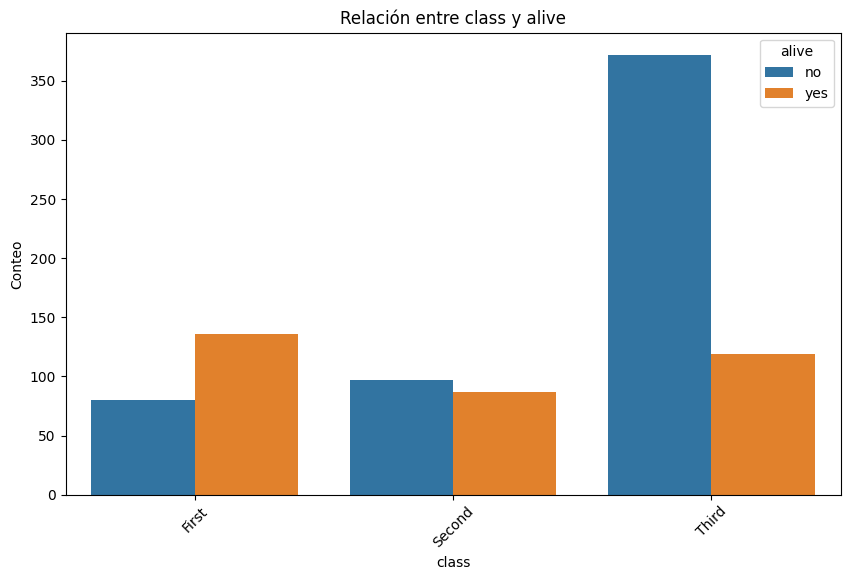

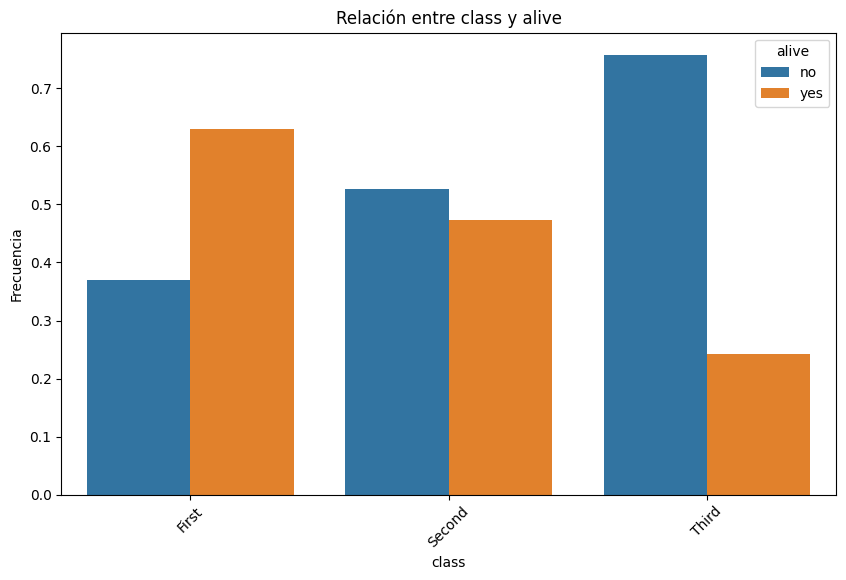

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [36]:
# bct.pinta_distribucion_categoricas(df, ['who'])
bct.plot_categorical_relationship_fin(df, 'class', 'alive')
# bct.plot_categorical_relationship_fin(df, 'adult_child', 'alive', relative_freq=True)
bct.plot_categorical_relationship_fin(df, 'class', 'alive', relative_freq=True)

tabla_contingencia = pd.crosstab(df['alive'], df['class'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

#### **2_ Tanto en terminos absolutos como relativos sobrevivieron más personas de primera clase que de cualquiera de las otras dos. Y sí, la prueba de Chi confirma que hay fuerte relación estadística entre la clase en la que ibas y la probabilidad de sobrevivir.**

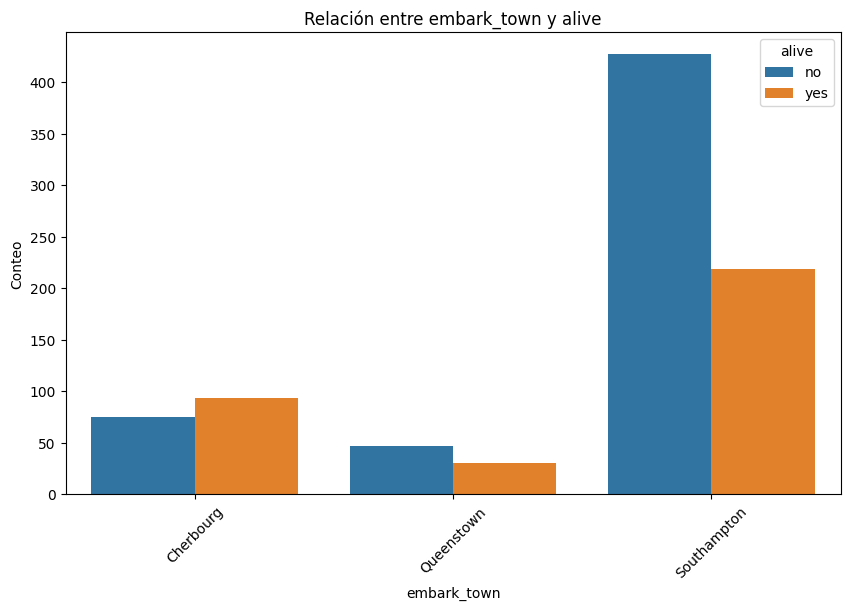

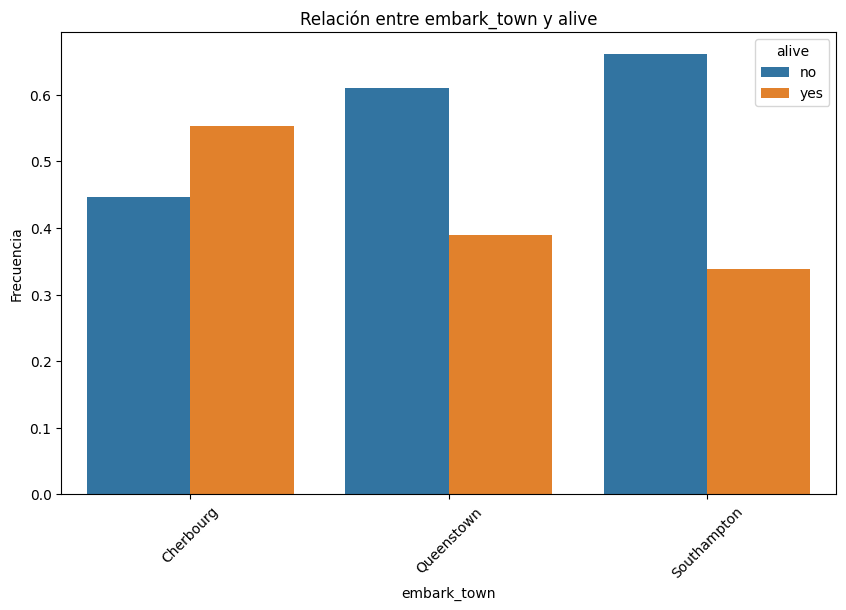

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


In [38]:
# bct.pinta_distribucion_categoricas(df, ['who'])
bct.plot_categorical_relationship_fin(df, 'embark_town', 'alive')
# bct.plot_categorical_relationship_fin(df, 'adult_child', 'alive', relative_freq=True)
bct.plot_categorical_relationship_fin(df, 'embark_town', 'alive', relative_freq=True)

tabla_contingencia = pd.crosstab(df['alive'], df['embark_town'])
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

#### **3_ En términos absolutos sobrevivieron más personas de Southampton, pero en términos relativos sobrevivieron más de Cherbourg, de hecho Southampton es dónde menos sobrevivieron. Y sí, la prueba de Chi confirma que hay fuerte relación estadística entre la ciurdad en la que embarcaste y la probabilidad de sobrevivir.**

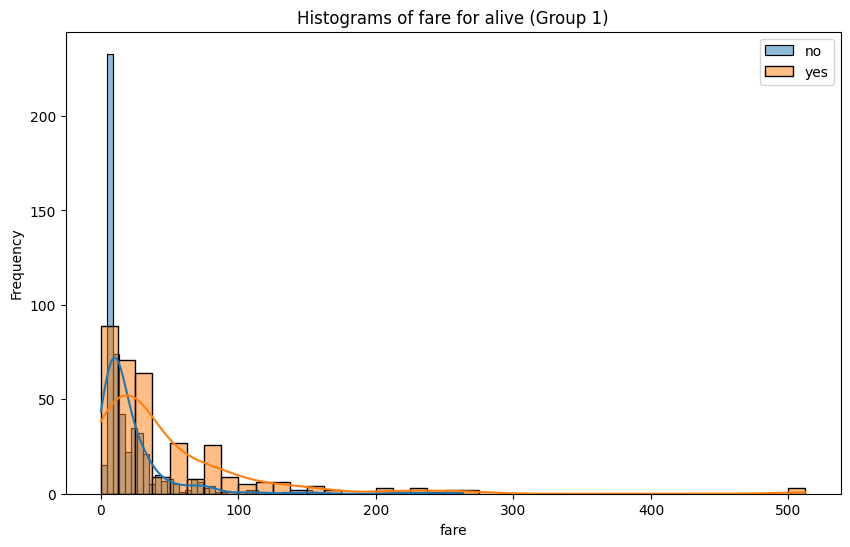

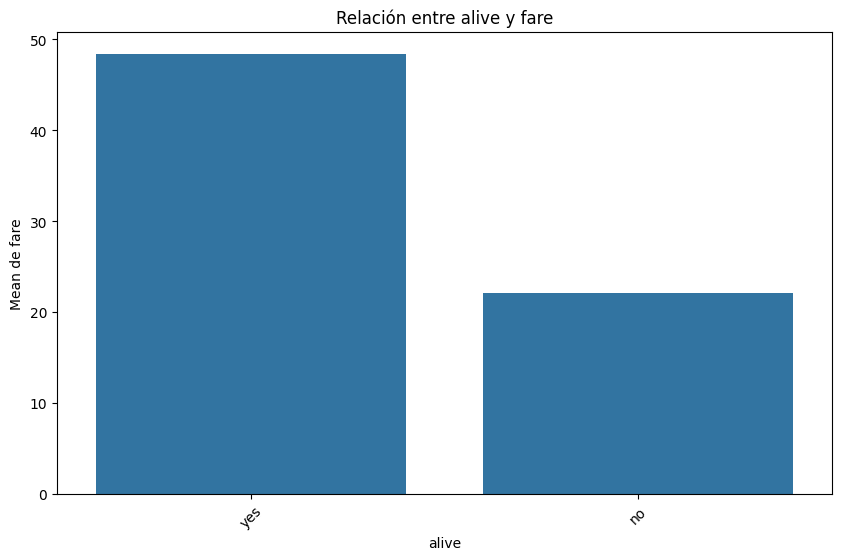

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


In [42]:
bct.plot_grouped_histograms(df, cat_col="alive",num_col="fare", group_size= 2)
bct.plot_categorical_numerical_relationship(df,'alive', 'fare')

grupo_a = df.loc[df.alive == "yes"]["fare"]
grupo_b = df.loc[df.alive == "no"]["fare"]
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

#### **4_ La relación es fuerte entre el fare y la probabilidad de sobrevivir, tal y como confirma el Valor p. La relación es tal que cuanto mayor es el fare más probabilidades de sobrevivir. En el segundo gráfico podemos ver que la media del fare de la gente que sobrevivió duplica a la de la que no sobrevivió.**

In [56]:
df_0fare = df[df['fare'] == 0]
df_0fare.columns.tolist()

['sex',
 'age',
 'fare',
 'class',
 'who',
 'adult_male',
 'embark_town',
 'alive',
 'alone',
 'family_menbers',
 'adult_child']

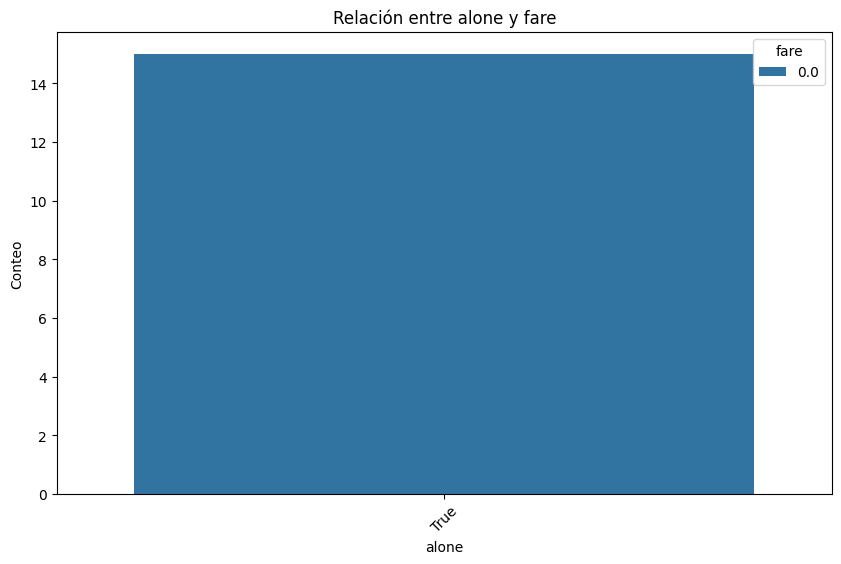

In [61]:
# bct.plot_categorical_relationship_fin(df_0fare, 'who', 'fare')
# bct.plot_categorical_relationship_fin(df_0fare, 'embark_town', 'fare')
bct.plot_categorical_relationship_fin(df_0fare, 'alone', 'fare')
# bct.plot_categorical_relationship_fin(df_0fare, 'class', 'fare')
# bct.plot_categorical_relationship_fin(df_0fare, 'age', 'fare')
# bct.plot_categorical_relationship_fin(df_0fare, 'family_menbers', 'fare')

([<matplotlib.axis.XTick at 0x27e9f78c890>,
 [Text(1, 0, 'True'),
  Text(2, 0, 'True'),
  Text(3, 0, 'True'),
  Text(4, 0, 'True'),
  Text(5, 0, 'True'),
  Text(6, 0, 'True'),
  Text(7, 0, 'True'),
  Text(8, 0, 'True'),
  Text(9, 0, 'True'),
  Text(10, 0, 'True'),
  Text(11, 0, 'True'),
  Text(12, 0, 'True'),
  Text(13, 0, 'True'),
  Text(14, 0, 'True'),
  Text(15, 0, 'True'),
  Text(16, 0, 'True'),
  Text(17, 0, 'True'),
  Text(18, 0, 'True'),
  Text(19, 0, 'True'),
  Text(20, 0, 'True'),
  Text(21, 0, 'False'),
  Text(22, 0, 'True'),
  Text(23, 0, 'True'),
  Text(24, 0, 'True'),
  Text(25, 0, 'True'),
  Text(26, 0, 'True'),
  Text(27, 0, 'True'),
  Text(28, 0, 'True'),
  Text(29, 0, 'False'),
  Text(30, 0, 'True'),
  Text(31, 0, 'True'),
  Text(32, 0, 'True'),
  Text(33, 0, 'True'),
  Text(34, 0, 'True'),
  Text(35, 0, 'True'),
  Text(36, 0, 'True'),
  Text(37, 0, 'False'),
  Text(38, 0, 'True'),
  Text(39, 0, 'True'),
  Text(40, 0, 'True'),
  Text(41, 0, 'True'),
  Text(42, 0, 'True

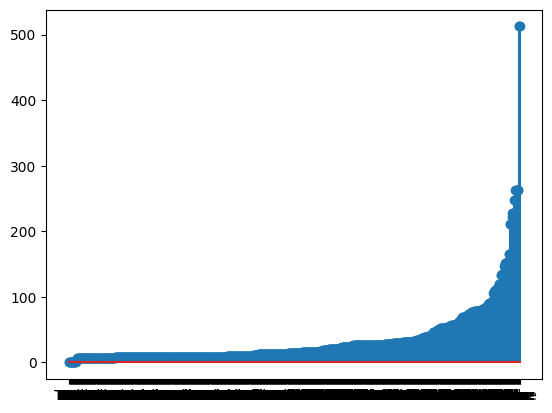

In [68]:
# Reorder it following the values:
ordered_df = df.sort_values(by='fare')
my_range=range(1,len(df.index)+1)

# Make the plot
plt.stem(ordered_df['fare'])
plt.xticks( my_range, ordered_df['alone'])

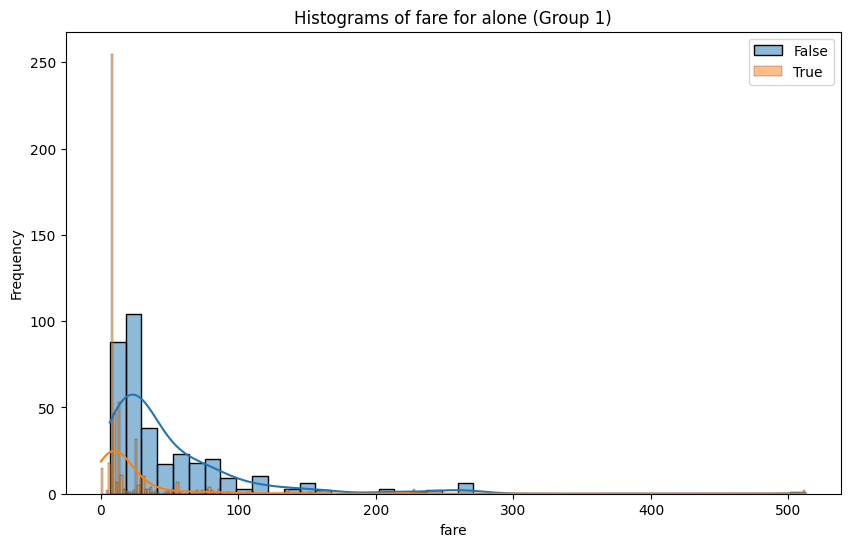

In [70]:
bct.plot_grouped_histograms(df, "alone","fare",group_size= 2)

In [72]:
df.loc[df['fare'].idxmax(), 'alive']

'yes'

#### **5_ Los pasajeros que no pagaron el billetes, viajaban todos juntos y eran hombres. Que no quiere decir que todo el mundo que fuera hombre y viajara solo no pagara. Por otro lado, la persona que más pagó sobrevivió.**

Respuesta no:


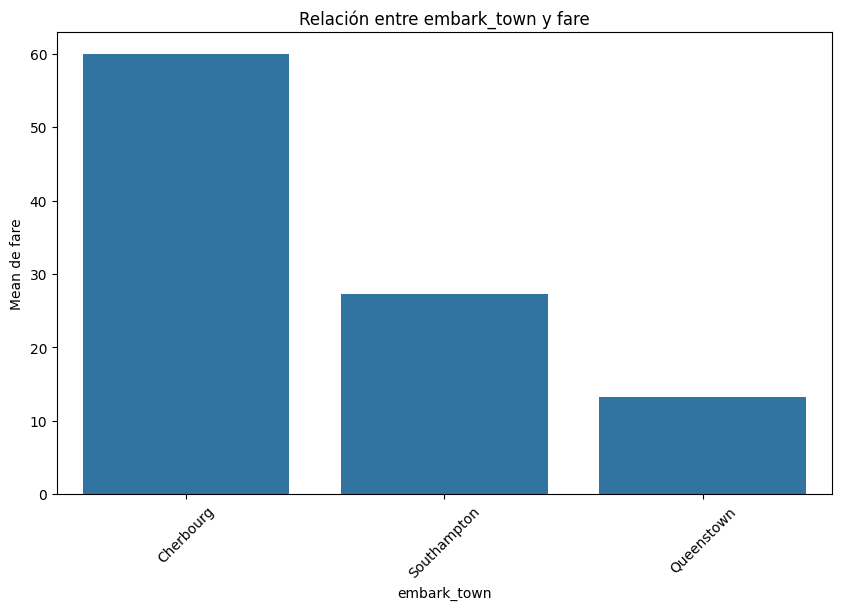

Respuesta yes:


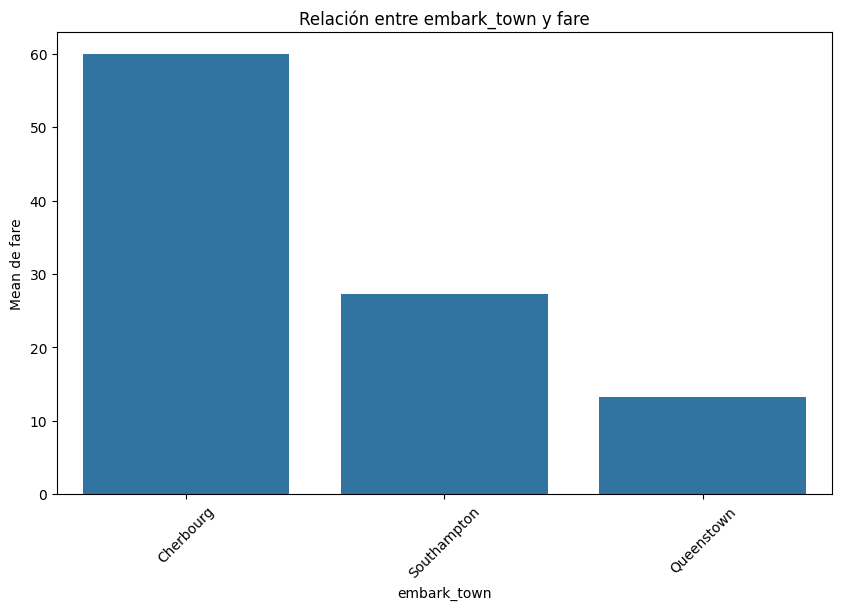

In [91]:
columnas = ["embark_town","alive","fare"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bct.plot_categorical_numerical_relationship(df, col_1, col_2, show_values=False, measure='mean')

#### **6_ No parece haber relación entre las tres. Es independiente la ciudad desde la que salieras para sobervivir o no. Pero sí que depende de la ciudad en la que salieras lo que pagabas.**

Respuesta Third:


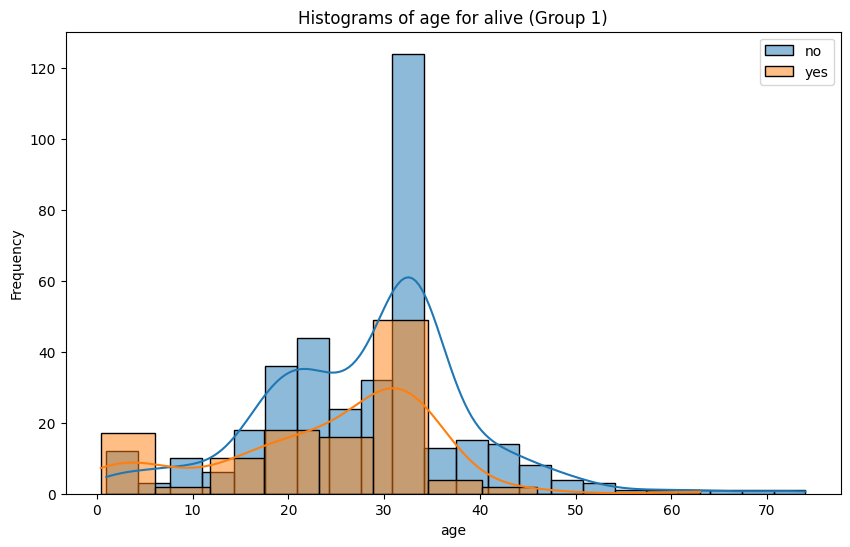

Respuesta First:


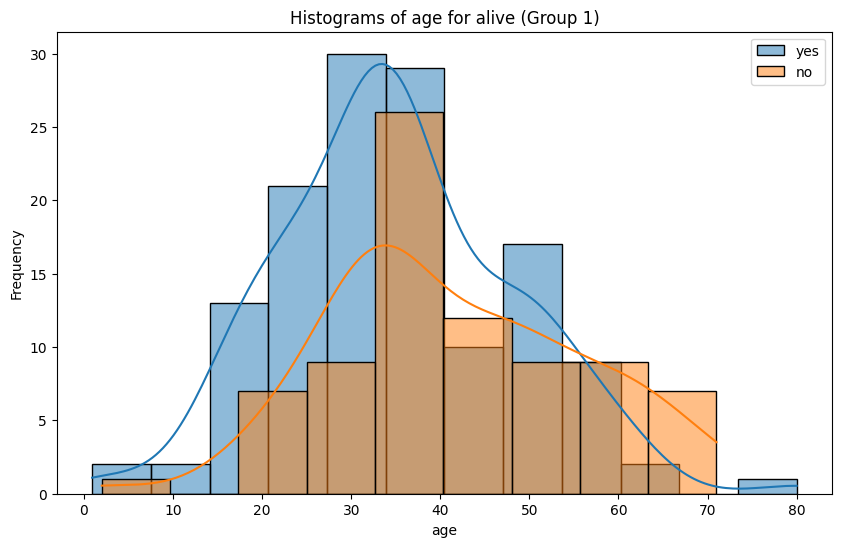

Respuesta Second:


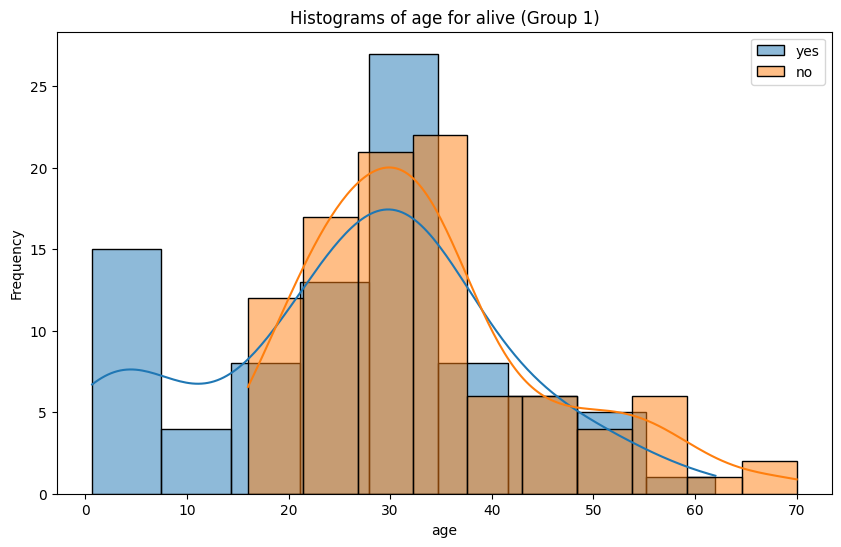

In [98]:
columnas = ["alive","class","age"] 
col_directora = "class"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bct.plot_grouped_histograms(df_datos, col_1, col_2, 2)

#### **7_ Las gráficas no dan datos exactos, pero el valor absoluto de edad y clase más absoluto estaría entre los treinta y pocos y primera y tercera clase. Claramente ganan los menores de edad de segunda y también de primera clase que apenas murió una persona.**

Respuesta no:


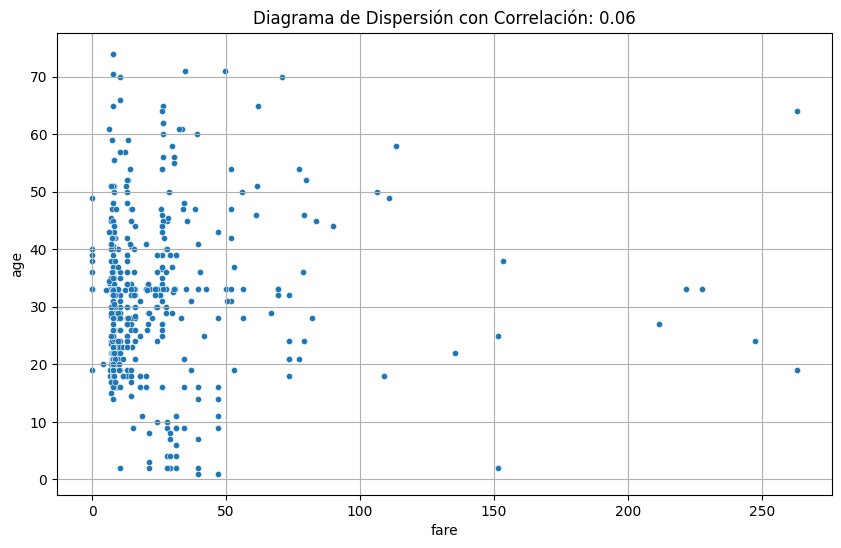

Respuesta yes:


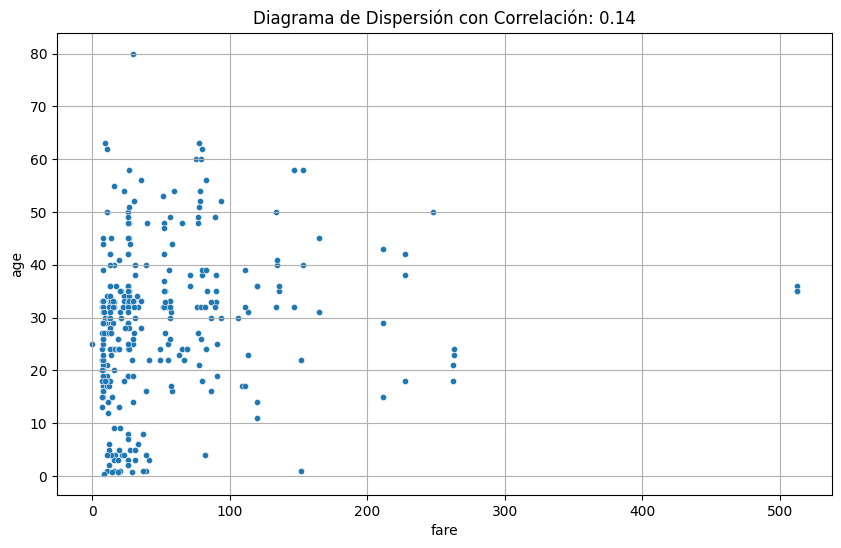

In [95]:
columnas = ["alive","fare","age"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    bct.grafico_dispersion_con_correlacion(df_datos,col_1,col_2, tamano_puntos=20, mostrar_correlacion= True)

#### **8_ Puedo decir la gente que sobrevivió es en general más joven. Y que la mayoría parece que pagó entre 0 y 100. La que falleció parece ser más adulta y muerta un poco más de dispersión en el precio del billete. **

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

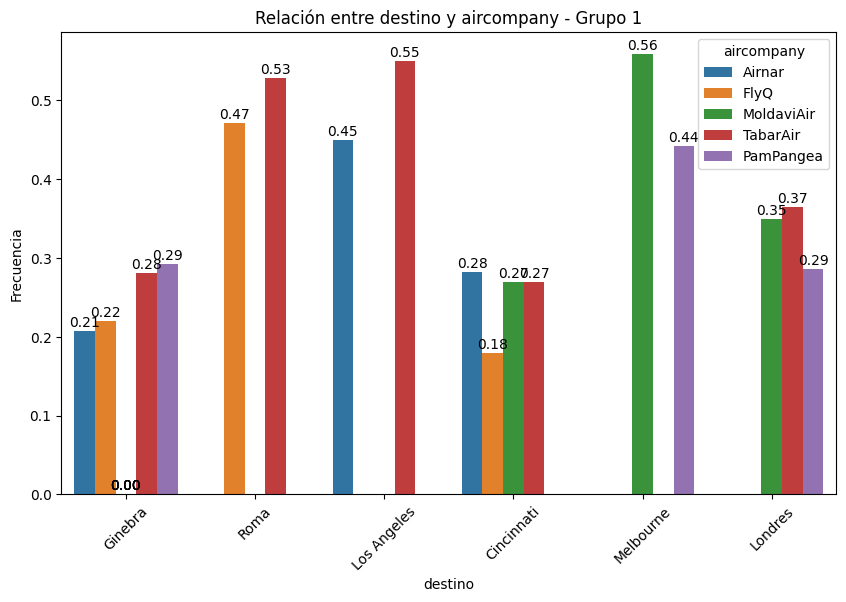

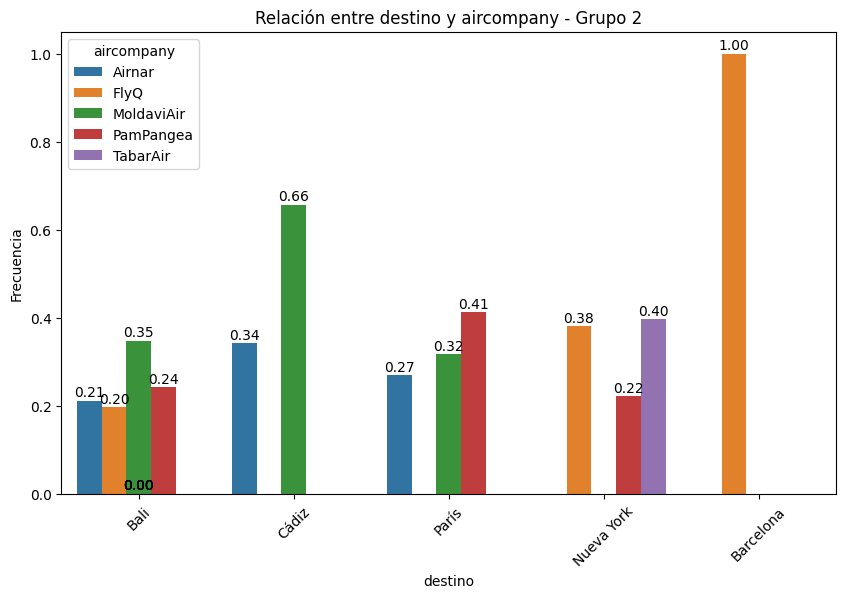

In [108]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
bct.plot_categorical_relationship_fin(df_air_jun, "destino","aircompany", relative_freq = True, show_values = True, size_group = 6)

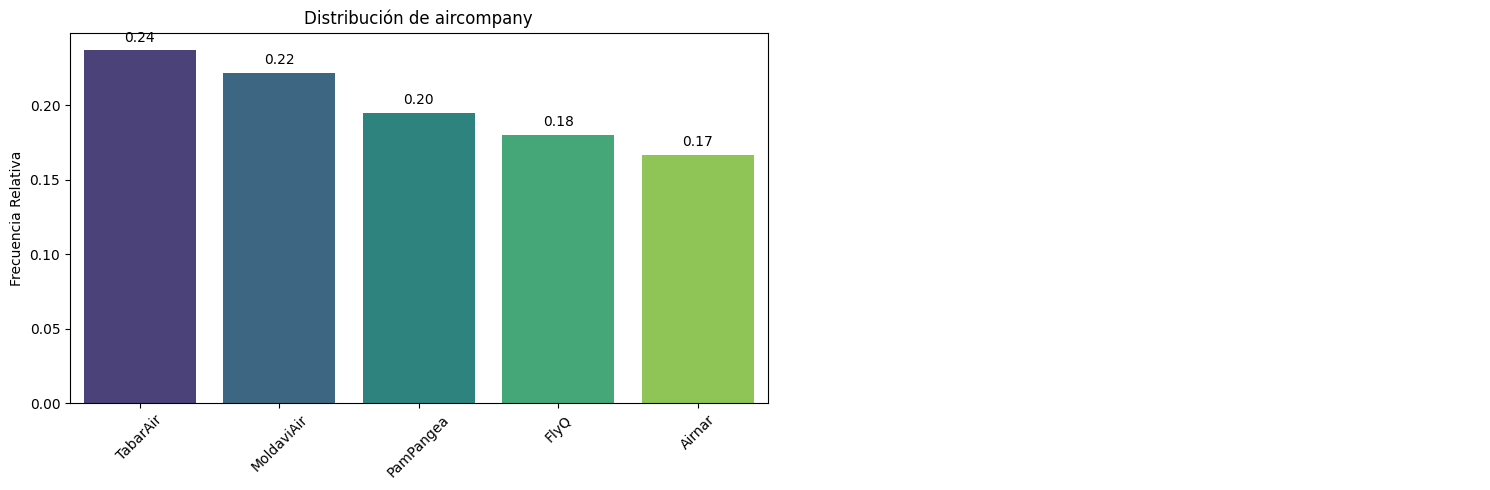

(2,)


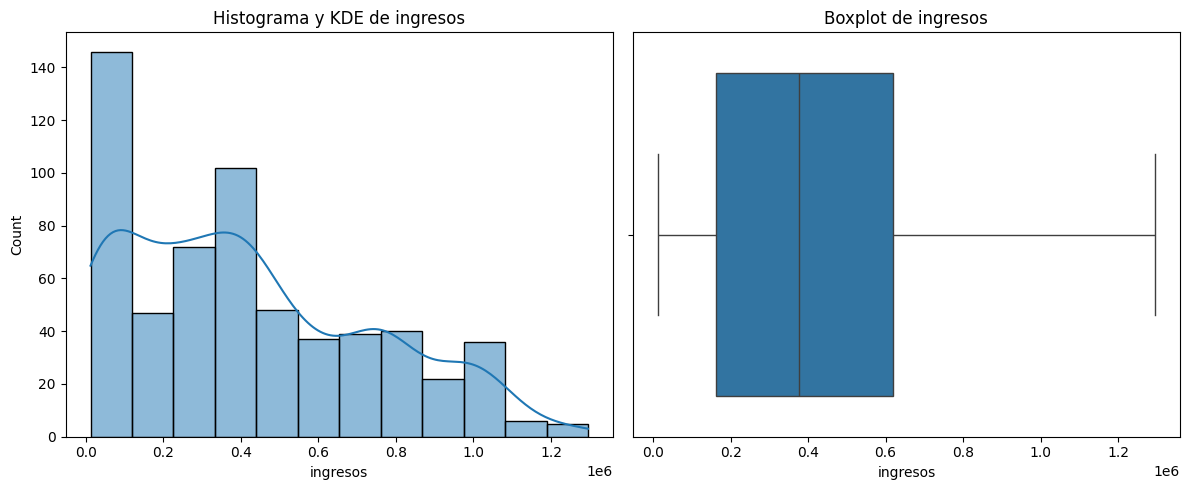

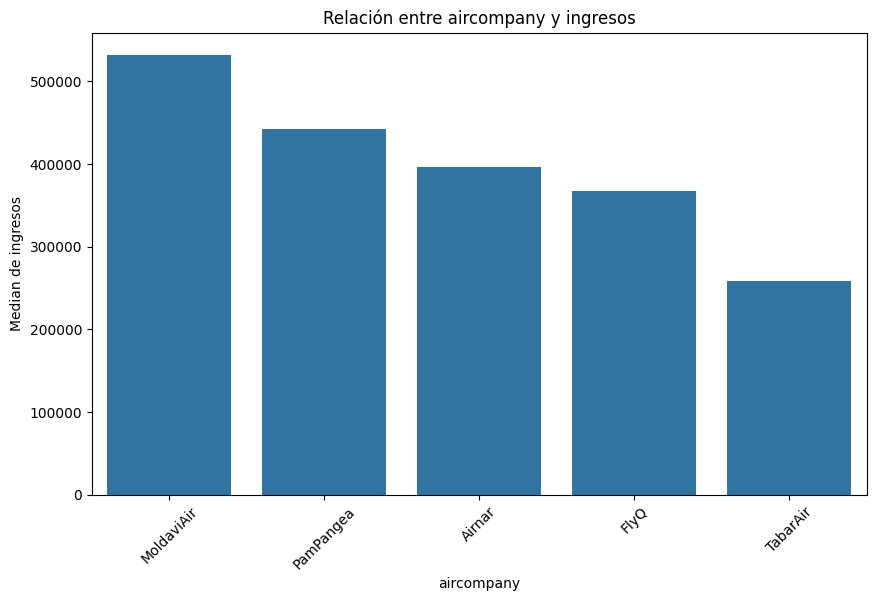

In [113]:
bct.pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)
bct.plot_combined_graphs(df_air_jun,["ingresos"])
bct.plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median")

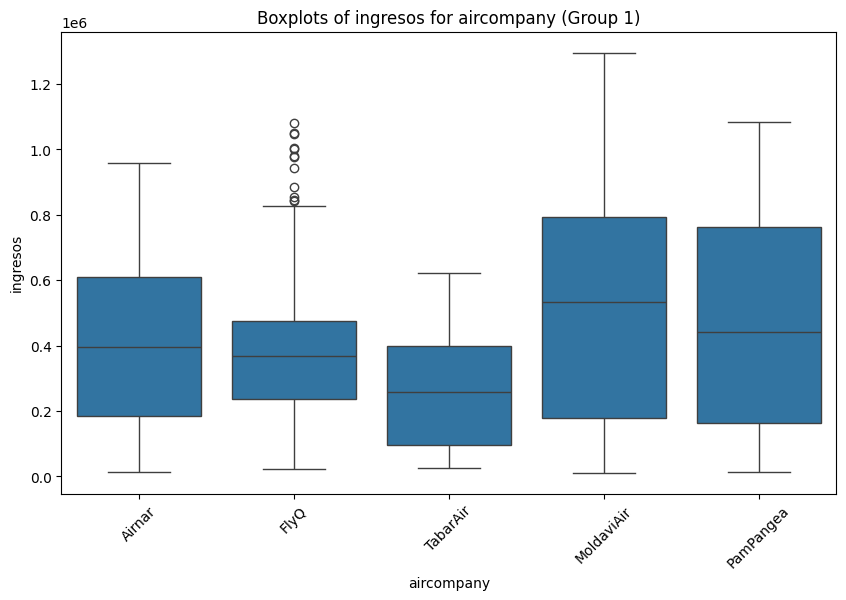

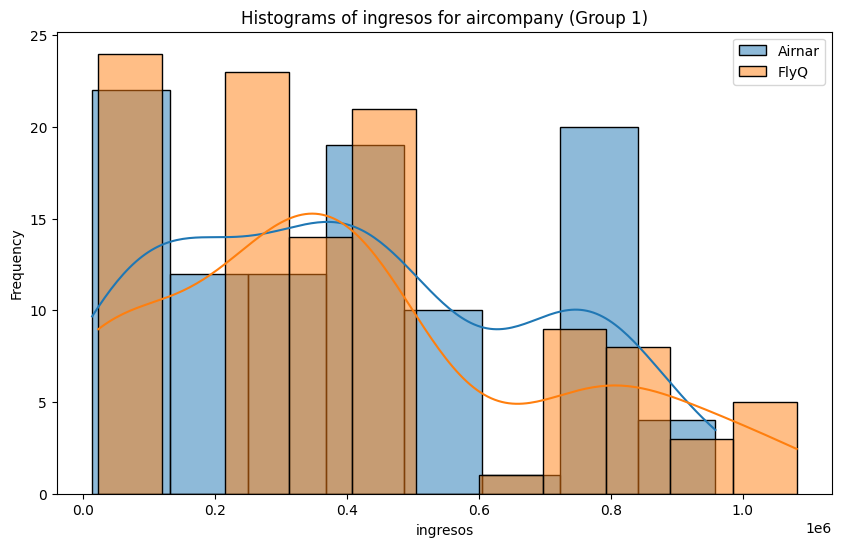

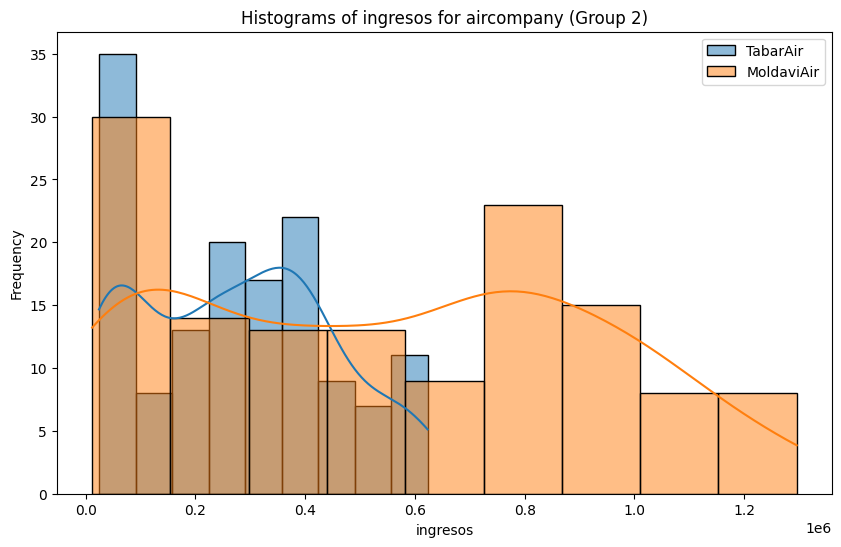

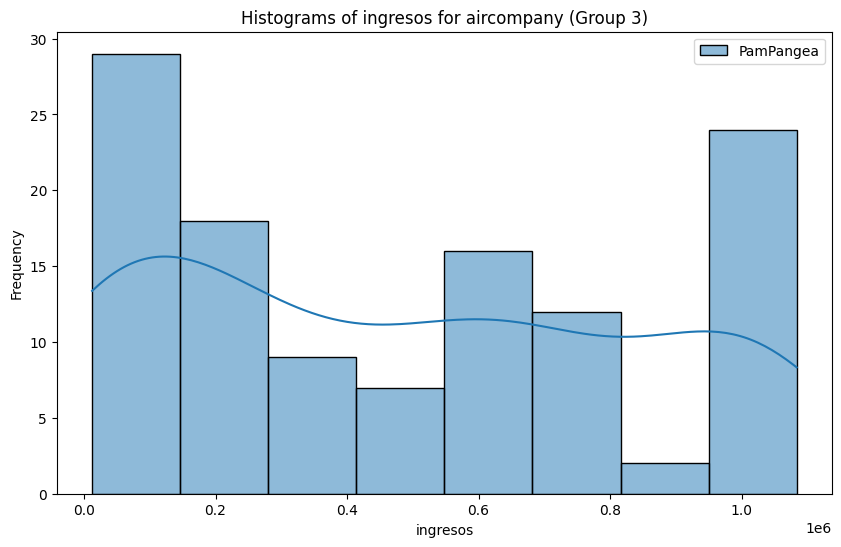

In [115]:
bct.plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")
bct.plot_grouped_histograms(df_air_jun,"aircompany", "ingresos", 2)

In [116]:
# Lo que nos llama la atención es que TabarAir es la que más vuelos realiza, pero la que menos gana, y es la que menos ingresa por vuelo. Habría que ver a qué se debe esa baja rentabilidad.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


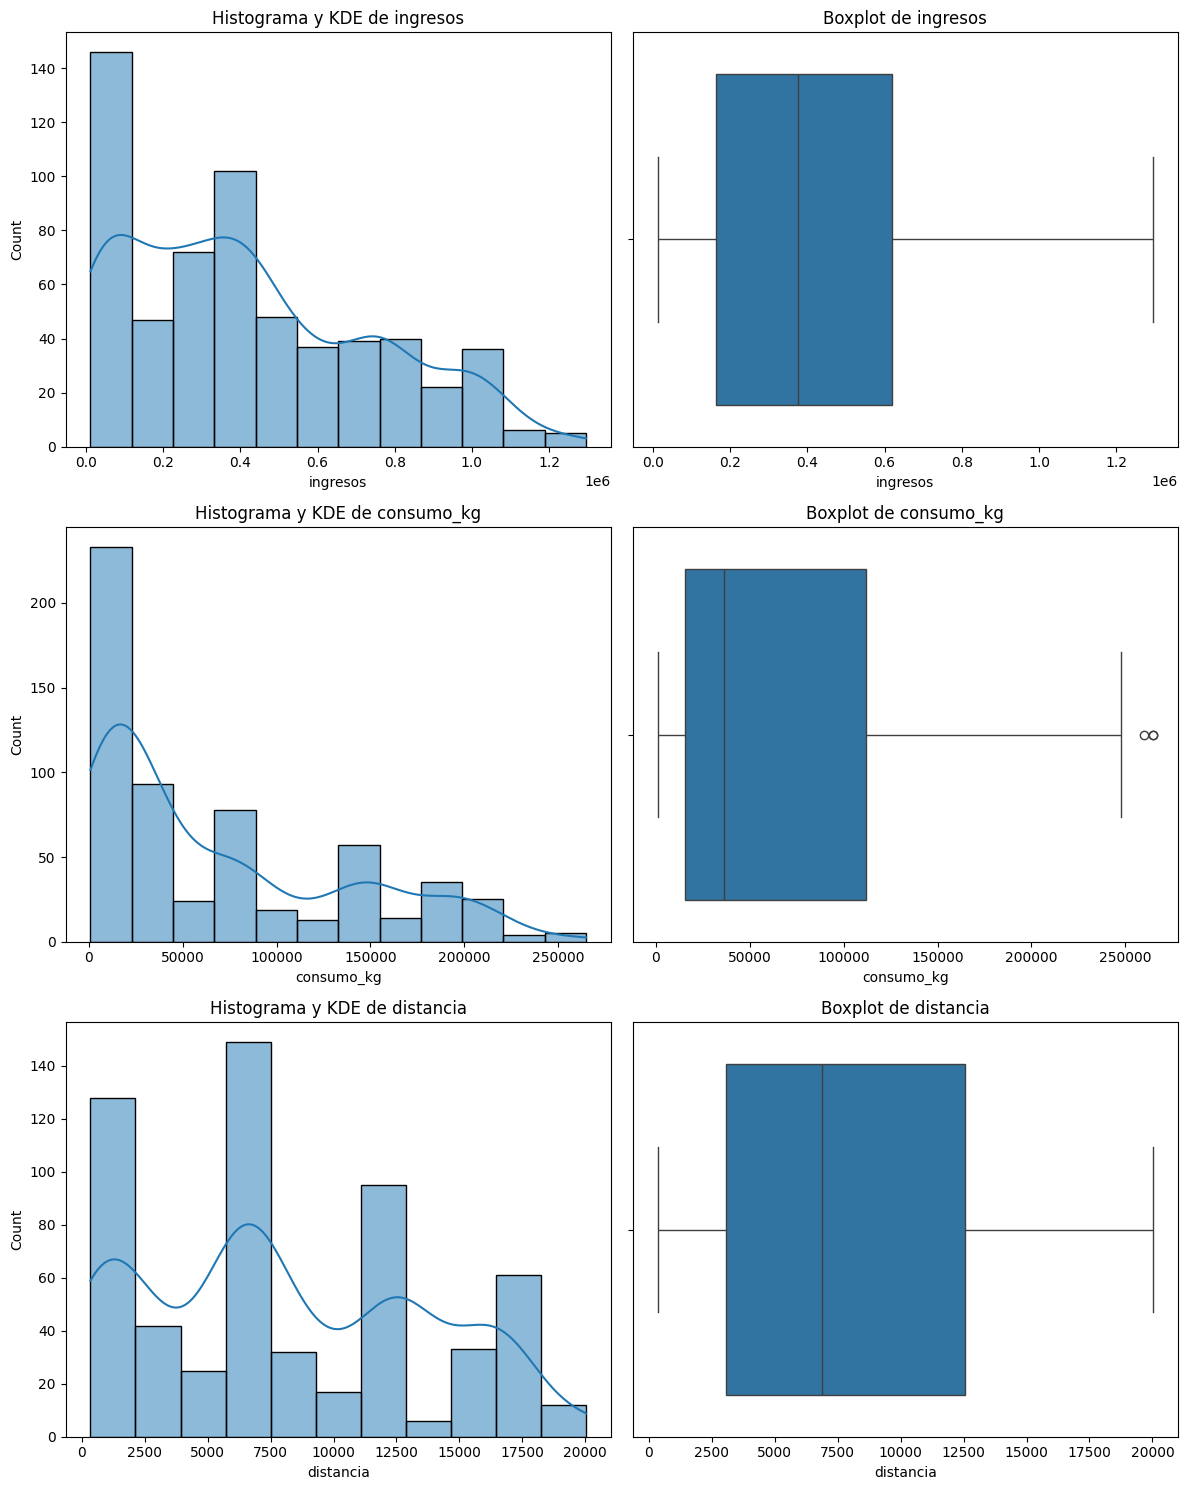

In [120]:
bct.plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

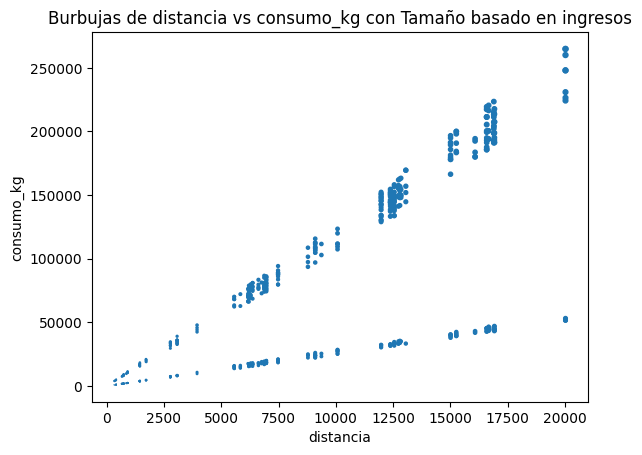

In [121]:
bct.bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

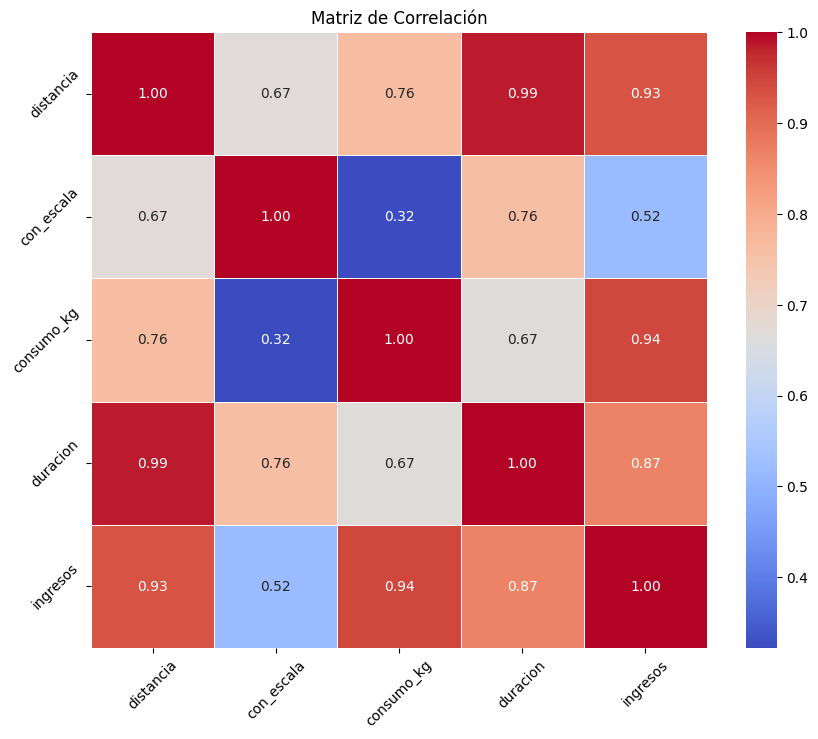

In [122]:
corr_matrix = df_air_jun.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

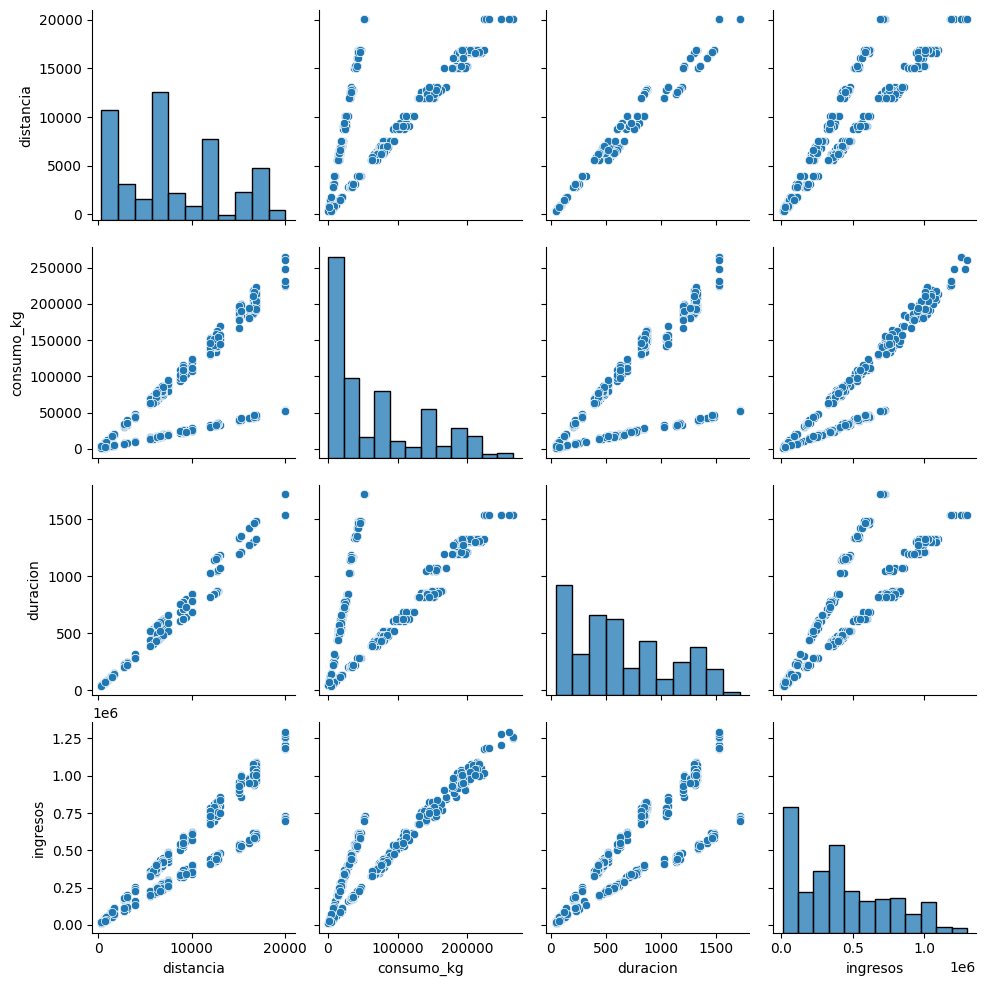

In [123]:
df_solo_numeros = df_air_jun.select_dtypes(include = ["float","int"])
sns.pairplot(df_solo_numeros)
plt.show()

#### Vimos que había dos líneas diferenciadas que podrían deberse a la eficiencia del tipo del avión. Pese a que en la velocidad (distancia/duración) no se aprecian diferencias, sí podemos ver claramente esas dos líneas, en consumo, que es probablemente lo que hace que varíen también los ingresos de la misma manera. El aumento no de consumo parece que es por la eficiencia del avión ya que no implica un aumento en la velocidad, y por lo tanto una disminución en la duración del viaje.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [126]:
df_air_jun['cat_vuelo'] = pd.qcut(df_air_jun['distancia'], q=4, labels=['Cuartil 1', 'Cuartil 2', 'Cuartil 3', 'Cuartil 4'])
df_air_jun.head(7)


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,Cuartil 1
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,Cuartil 4
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,Cuartil 3
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,Cuartil 2
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,Cuartil 3
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23,Cuartil 4
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23,Cuartil 1


(3, 2)


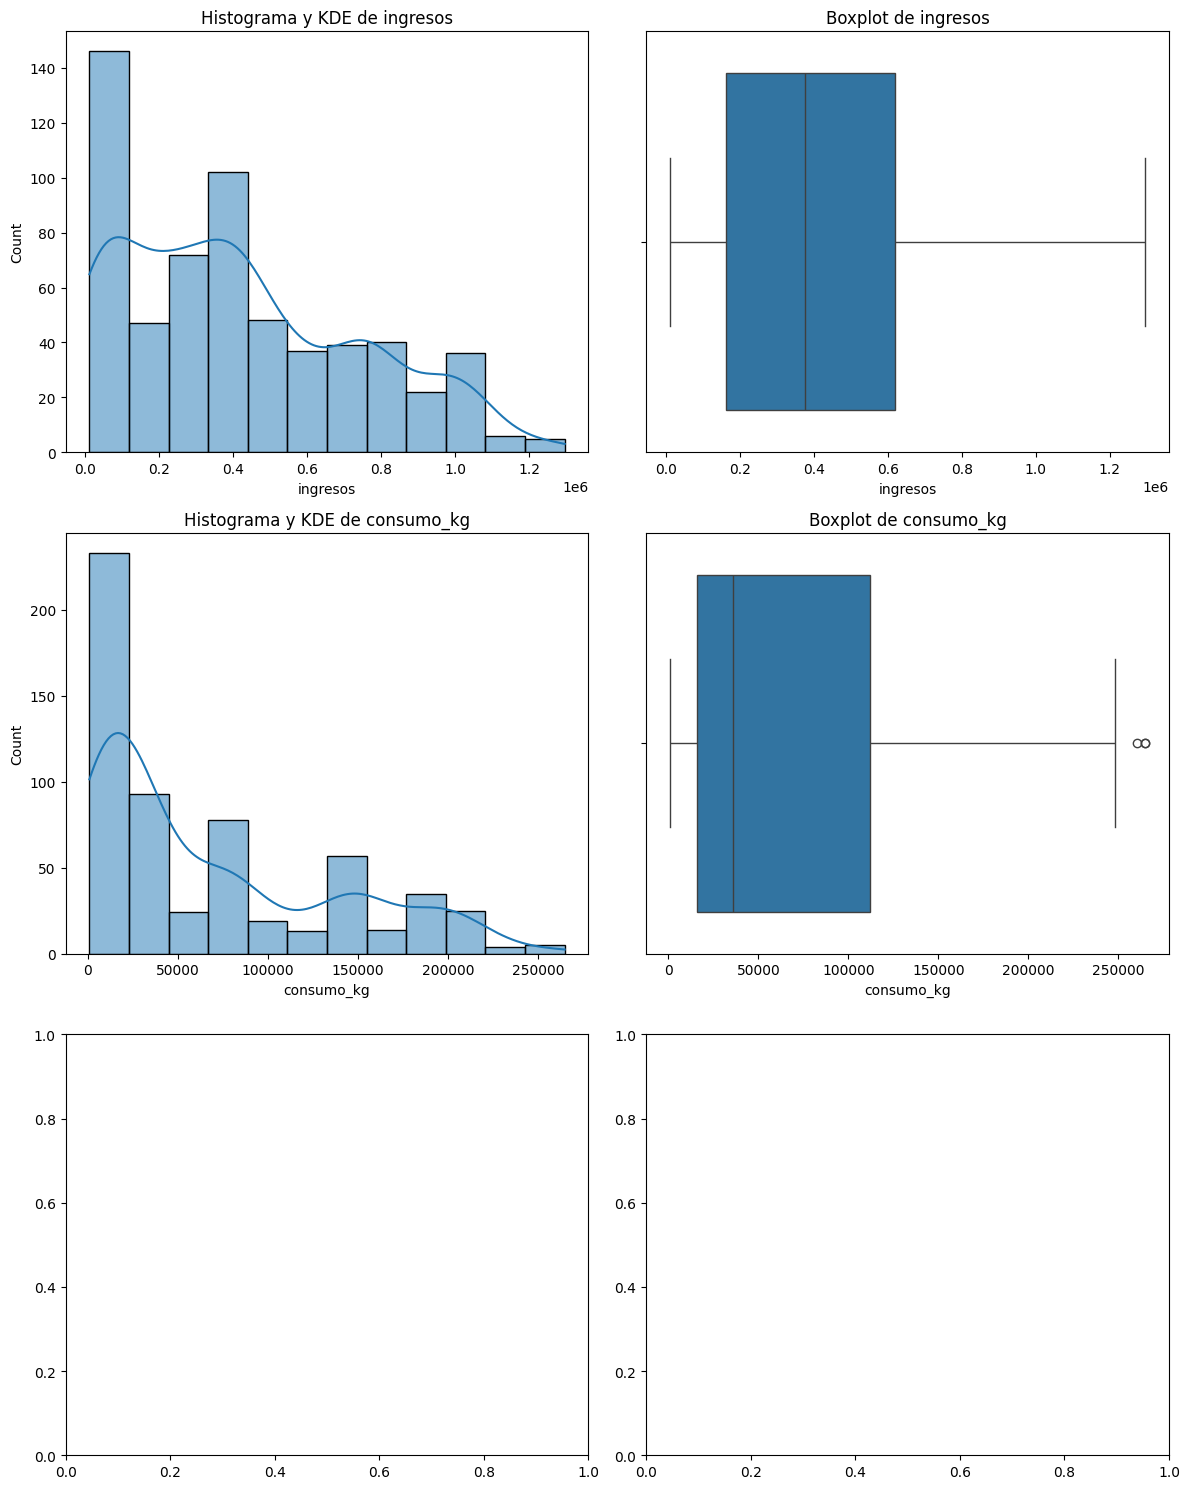

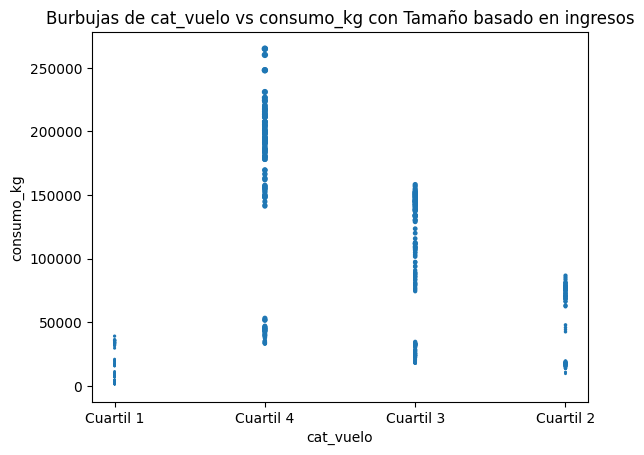

In [127]:
bct.plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","cat_vuelo"])
bct.bubble_plot(df_air_jun,"cat_vuelo","consumo_kg","ingresos", scale = 100000)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.